<a href="https://colab.research.google.com/github/Singh-AP/Intracranial-Aneurysm/blob/main/shufflenet_of_IntracranialAneurysm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Major Project - Cerebral Aneurysm detection and Segementaiton
 
"""

'\nMajor Project - Cerebral Aneurysm detection and Segementaiton\n \n'

In [ ]:
#Get necessary tools
!git clone https://github.com/intra3d2019/IntrA.git
!cp -r IntrA/tools/* .
!ls

Cloning into 'IntrA'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 207 (delta 26), reused 0 (delta 0), pack-reused 136
Receiving objects: 100% (207/207), 47.48 MiB | 21.75 MiB/s, done.
Resolving deltas: 100% (77/77), done.
annotation     calculation.py  random_pick.py  selection.py	 show_result.py
calculation.c  IntrA	       sample_data     show_ann_data.py  vessels.py


In [ ]:
!git clone https://github.com/yanx27/Pointnet_Pointnet2_pytorch.git
!cp -r Pointnet_Pointnet2_pytorch/* .

Cloning into 'Pointnet_Pointnet2_pytorch'...
remote: Enumerating objects: 667, done.
remote: Total 667 (delta 0), reused 0 (delta 0), pack-reused 667
Receiving objects: 100% (667/667), 1.46 MiB | 25.71 MiB/s, done.
Resolving deltas: 100% (389/389), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !mkdir datasets
!unzip /content/drive/My\ Drive/IntrA.zip -d datasets/
!unzip /content/drive/My\ Drive/geo.zip -d datasets/

Archive:  /content/drive/My Drive/IntrA.zip
   creating: datasets/IntrA/
   creating: datasets/IntrA/annotated/
   creating: datasets/IntrA/annotated/ad/
  inflating: datasets/IntrA/annotated/ad/AN1-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN11-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN116-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN117-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN119-1-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN119-2-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN120-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN121-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN125-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN128-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN129-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN134-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN135-_norm.ad  
  inflating: datasets/IntrA/annotated/ad/AN136-_norm.ad  
  inflating: datasets/IntrA/annot

In [ ]:

!unzip /content/drive/MyDrive/drive-download-20201119T144513Z-001 -d /content/datasets/IntrA/generated


Archive:  /content/drive/MyDrive/drive-download-20201119T144513Z-001.zip
  inflating: /content/datasets/IntrA/generated/TrainV.txt  
  inflating: /content/datasets/IntrA/generated/ValidA.txt  
  inflating: /content/datasets/IntrA/generated/ValidV.txt  
  inflating: /content/datasets/IntrA/generated/TrainA.txt  
  inflating: /content/datasets/IntrA/generated/TestV.txt  
  inflating: /content/datasets/IntrA/generated/TestA.txt  


In [ ]:
# !ls -l datasets/IntrA/complete/ArteryObjAN116.obj
! echo vessels data files && ls datasets/IntrA/generated/vessel/ad/ | wc -l
! echo aneurysm data files && ls datasets/IntrA/generated/aneurysm/ad/ | wc -l


vessels data files
1694
aneurysm data files
215


In [ ]:
# !wget --no-check-certificate https://shapenet.cs.stanford.edu/media/modelnet40_normal_resampled.zip
# !mkdir modelnet
# !unzip modelnet40_normal_resampled.zip -d modelnet/
# !rm modelnet40_normal_resampled.zip
# !less /content/modelnet/modelnet40_normal_resampled/airplane/airplane_0001.txt


In [ ]:
# def update():
#     import time
#     while True:
#         print('Hello World!')
#         time.sleep(10)

# update()

In [ ]:
# ! wget --no-check-certificate https://shapenet.cs.stanford.edu/media/modelnet40_normal_resampled.zip
# !mkdir modelnet/resampled
# !unzip modelnet40_normal_resampled.zip -d modelnet/resampled

In [ ]:
import os
from sklearn.model_selection import train_test_split
X = os.listdir('/content/datasets/IntrA/generated/aneurysm/ad')
y= [1]*len(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [ ]:
################ Shanya's Code ################
import os
from sklearn.model_selection import train_test_split
X = os.listdir('/content/datasets/IntrA/generated/aneurysm/obj')
X2 = os.listdir('/content/datasets/IntrA/generated/vessel/obj')
X.sort()
X2.sort()
print(X[0])
print(X2[0])
y= [1]*len(X)
y2 = [1]*len(X2)
X_80, X_test, y_80, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_80, y_80, test_size=0.125, random_state=0)

print(len(X_train))
print(len(X_test))
print(len(X_valid))
print(len(y_train))
print(len(y_test))
print(len(y_valid))
print(len(X))
print(len(y))

X2_80, X2_test, y2_80, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=0)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2_80, y2_80, test_size=0.125, random_state=0)

print(len(X2_train))
print(len(X2_test))
print(len(X2_valid))
print(len(y2_train))
print(len(y2_test))
print(len(y2_valid))
print(len(X2))
print(len(y2))

#Hmmmmm.... A lot of repetition I see.


ArteryObjAN117-2.obj
ArteryObjAN1-0.obj
150
43
22
150
43
22
215
215
1185
339
170
1185
339
170
1694
1694


In [ ]:
#################### Shanya's Code Pt. 2 ######################
# Removing extensions:
#os.path.splitext("path/to/sample.txt")
#text_file = open("Output.txt", "w")
#text_file.write("Purchase Amount: " 'TotalAmount')
#text_file.close()
from google.colab import files
with open('ValidV.txt', 'w') as f:
  for x in X2_valid:
    temp = os.path.splitext(x)
    print(temp)
    str1 = temp[0] + "\n"
    f.write(str1)
files.download('ValidV.txt')

('ArteryObjAN121-12', '.obj')
('ArteryObjAN211-7', '.obj')
('ArteryObjAN44-10', '.obj')
('ArteryObjAN137-18', '.obj')
('ArteryObjAN6-3', '.obj')
('ArteryObjAN23-12', '.obj')
('ArteryObjAN137-12', '.obj')
('ArteryObjAN198-6', '.obj')
('ArteryObjAN215-1', '.obj')
('ArteryObjAN55-6', '.obj')
('ArteryObjAN125-17', '.obj')
('ArteryObjAN165-18', '.obj')
('ArteryObjAN190-14', '.obj')
('ArteryObjAN183-14', '.obj')
('ArteryObjAN187-1', '.obj')
('ArteryObjAN199-18', '.obj')
('ArteryObjAN155-4', '.obj')
('ArteryObjAN55-9', '.obj')
('ArteryObjAN32-17', '.obj')
('ArteryObjAN121-7', '.obj')
('ArteryObjAN174-7', '.obj')
('ArteryObjAN152-13', '.obj')
('ArteryObjAN119-13', '.obj')
('ArteryObjAN215-16', '.obj')
('ArteryObjAN187-2', '.obj')
('ArteryObjAN197-18', '.obj')
('ArteryObjAN216-16', '.obj')
('ArteryObjAN19-18', '.obj')
('ArteryObjAN192-11', '.obj')
('ArteryObjAN138-13', '.obj')
('ArteryObjAN32-18', '.obj')
('ArteryObjAN208-0', '.obj')
('ArteryObjAN172-18', '.obj')
('ArteryObjAN216-5', '.obj')
('

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#################### Shanya's Code Pt. 3 ######################
obj1 = os.listdir('/content/datasets/IntrA/generated/aneurysm/obj')
obj2 = os.listdir('/content/datasets/IntrA/generated/vessel/obj')
obj1.sort()
obj2.sort()
print(obj1[0])
print(obj2[0])
j = 0
for i in range(len(X)):
  common = os.path.commonprefix([X[i], obj1[i]])
  print(common)

ArteryObjAN117-2.obj
ArteryObjAN1-0.obj
ArteryObjAN117-2.obj
ArteryObjAN117-5.obj
ArteryObjAN117-8.obj
ArteryObjAN121-5.obj
ArteryObjAN136-1.obj
ArteryObjAN136-2.obj
ArteryObjAN136-4.obj
ArteryObjAN136-6.obj
ArteryObjAN136-8.obj
ArteryObjAN149-4.obj
ArteryObjAN149-7.obj
ArteryObjAN149-8.obj
ArteryObjAN151-0.obj
ArteryObjAN151-3.obj
ArteryObjAN153-0.obj
ArteryObjAN153-2.obj
ArteryObjAN153-5.obj
ArteryObjAN153-6.obj
ArteryObjAN157-2.obj
ArteryObjAN157-5.obj
ArteryObjAN157-7.obj
ArteryObjAN157-9.obj
ArteryObjAN159-0.obj
ArteryObjAN159-1.obj
ArteryObjAN159-14.obj
ArteryObjAN159-4.obj
ArteryObjAN159-7.obj
ArteryObjAN160-1.obj
ArteryObjAN160-2.obj
ArteryObjAN160-4.obj
ArteryObjAN160-6.obj
ArteryObjAN160-7.obj
ArteryObjAN160-9.obj
ArteryObjAN161-0.obj
ArteryObjAN161-1.obj
ArteryObjAN161-4.obj
ArteryObjAN161-5.obj
ArteryObjAN161-8.obj
ArteryObjAN162-10.obj
ArteryObjAN162-4.obj
ArteryObjAN162-5.obj
ArteryObjAN163-1.obj
ArteryObjAN163-10.obj
ArteryObjAN163-11.obj
ArteryObjAN163-14.obj
ArteryObjA

In [ ]:
# print(len(X_train), X_train[:5])
# print(len(X))
# print(len(X_test), X_test[:5])
# print(y_train[0:10])

# # > generate list of files on aneurysm and vessel dirs.
# # > split them into train, val, test
# # > create the list of files into a np array
!pip install open3d
# !unzip /content/datasets/IntrA/generated/drive-download-20201119T144513Z-001.zip -d /content/datasets/IntrA/generated/ #upload the zip file manually first


     |████████████████████████████████| 103.6MB 37kB/s 


In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from time import time
import numpy as np

def timeit(tag, t):
    print("{}: {}s".format(tag, time() - t))
    return time()

def pc_normalize(pc):
    l = pc.shape[0]
    centroid = np.mean(pc, axis=0)
    pc = pc - centroid
    m = np.max(np.sqrt(np.sum(pc**2, axis=1)))
    pc = pc / m
    return pc

def square_distance(src, dst):
    """
    Calculate Euclid distance between each two points.

    src^T * dst = xn * xm + yn * ym + zn * zm；
    sum(src^2, dim=-1) = xn*xn + yn*yn + zn*zn;
    sum(dst^2, dim=-1) = xm*xm + ym*ym + zm*zm;
    dist = (xn - xm)^2 + (yn - ym)^2 + (zn - zm)^2
         = sum(src**2,dim=-1)+sum(dst**2,dim=-1)-2*src^T*dst

    Input:
        src: source points, [B, N, C]
        dst: target points, [B, M, C]
    Output:
        dist: per-point square distance, [B, N, M]
    """
    B, N, _ = src.shape
    _, M, _ = dst.shape
    dist = -2 * torch.matmul(src, dst.permute(0, 2, 1))
    dist += torch.sum(src ** 2, -1).view(B, N, 1)
    dist += torch.sum(dst ** 2, -1).view(B, 1, M)
    return dist


def index_points(points, idx):
    """

    Input:
        points: input points data, [B, N, C]
        idx: sample index data, [B, S]
    Return:
        new_points:, indexed points data, [B, S, C]
    """
    device = points.device
    B = points.shape[0]
    view_shape = list(idx.shape)
    view_shape[1:] = [1] * (len(view_shape) - 1)
    repeat_shape = list(idx.shape)
    repeat_shape[0] = 1
    batch_indices = torch.arange(B, dtype=torch.long).to(device).view(view_shape).repeat(repeat_shape)
    new_points = points[batch_indices, idx, :]
    return new_points


def farthest_point_sample(xyz, npoint):
    """
    Input:
        xyz: pointcloud data, [B, N, 3]
        npoint: number of samples
    Return:
        centroids: sampled pointcloud index, [B, npoint]
    """
    device = xyz.device
    B, N, C = xyz.shape
    centroids = torch.zeros(B, npoint, dtype=torch.long).to(device)
    distance = torch.ones(B, N).to(device) * 1e10
    farthest = torch.randint(0, N, (B,), dtype=torch.long).to(device)
    batch_indices = torch.arange(B, dtype=torch.long).to(device)
    for i in range(npoint):
        centroids[:, i] = farthest
        centroid = xyz[batch_indices, farthest, :].view(B, 1, 3)
        dist = torch.sum((xyz - centroid) ** 2, -1)
        mask = dist < distance
        distance[mask] = dist[mask]
        farthest = torch.max(distance, -1)[1]
    return centroids


def query_ball_point(radius, nsample, xyz, new_xyz):
    """
    Input:
        radius: local region radius
        nsample: max sample number in local region
        xyz: all points, [B, N, 3]
        new_xyz: query points, [B, S, 3]
    Return:
        group_idx: grouped points index, [B, S, nsample]
    """
    device = xyz.device
    B, N, C = xyz.shape
    _, S, _ = new_xyz.shape
    group_idx = torch.arange(N, dtype=torch.long).to(device).view(1, 1, N).repeat([B, S, 1])
    sqrdists = square_distance(new_xyz, xyz)
    group_idx[sqrdists > radius ** 2] = N
    group_idx = group_idx.sort(dim=-1)[0][:, :, :nsample]
    group_first = group_idx[:, :, 0].view(B, S, 1).repeat([1, 1, nsample])
    mask = group_idx == N
    group_idx[mask] = group_first[mask]
    return group_idx


def sample_and_group(npoint, radius, nsample, xyz, points, returnfps=False):
    """
    Input:
        npoint:
        radius:
        nsample:
        xyz: input points position data, [B, N, 3]
        points: input points data, [B, N, D]
    Return:
        new_xyz: sampled points position data, [B, npoint, nsample, 3]
        new_points: sampled points data, [B, npoint, nsample, 3+D]
    """
    B, N, C = xyz.shape
    S = npoint
    fps_idx = farthest_point_sample(xyz, npoint) # [B, npoint, C]
    torch.cuda.empty_cache()
    new_xyz = index_points(xyz, fps_idx)
    torch.cuda.empty_cache()
    idx = query_ball_point(radius, nsample, xyz, new_xyz)
    torch.cuda.empty_cache()
    grouped_xyz = index_points(xyz, idx) # [B, npoint, nsample, C]
    torch.cuda.empty_cache()
    grouped_xyz_norm = grouped_xyz - new_xyz.view(B, S, 1, C)
    torch.cuda.empty_cache()

    if points is not None:
        grouped_points = index_points(points, idx)
        new_points = torch.cat([grouped_xyz_norm, grouped_points], dim=-1) # [B, npoint, nsample, C+D]
    else:
        new_points = grouped_xyz_norm
    if returnfps:
        return new_xyz, new_points, grouped_xyz, fps_idx
    else:
        return new_xyz, new_points


def sample_and_group_all(xyz, points):
    """
    Input:
        xyz: input points position data, [B, N, 3]
        points: input points data, [B, N, D]
    Return:
        new_xyz: sampled points position data, [B, 1, 3]
        new_points: sampled points data, [B, 1, N, 3+D]
    """
    device = xyz.device
    B, N, C = xyz.shape
    new_xyz = torch.zeros(B, 1, C).to(device)
    grouped_xyz = xyz.view(B, 1, N, C)
    if points is not None:
        new_points = torch.cat([grouped_xyz, points.view(B, 1, N, -1)], dim=-1)
    else:
        new_points = grouped_xyz
    return new_xyz, new_points


class PointNetSetAbstraction(nn.Module):
    def __init__(self, npoint, radius, nsample, in_channel, mlp, group_all):
        super(PointNetSetAbstraction, self).__init__()
        self.npoint = npoint
        self.radius = radius
        self.nsample = nsample
        self.mlp_convs = nn.ModuleList()
        self.mlp_bns = nn.ModuleList()
        last_channel = in_channel
        for out_channel in mlp:
            self.mlp_convs.append(nn.Conv2d(last_channel, out_channel, 1))
            self.mlp_bns.append(nn.BatchNorm2d(out_channel))
            last_channel = out_channel
        self.group_all = group_all

    def forward(self, xyz, points):
        """
        Input:
            xyz: input points position data, [B, C, N]
            points: input points data, [B, D, N]
        Return:
            new_xyz: sampled points position data, [B, C, S]
            new_points_concat: sample points feature data, [B, D', S]
        """
        xyz = xyz.permute(0, 2, 1)
        if points is not None:
            points = points.permute(0, 2, 1)

        if self.group_all:
            new_xyz, new_points = sample_and_group_all(xyz, points)
        else:
            new_xyz, new_points = sample_and_group(self.npoint, self.radius, self.nsample, xyz, points)
        # new_xyz: sampled points position data, [B, npoint, C]
        # new_points: sampled points data, [B, npoint, nsample, C+D]
        new_points = new_points.permute(0, 3, 2, 1) # [B, C+D, nsample,npoint]
        for i, conv in enumerate(self.mlp_convs):
            bn = self.mlp_bns[i]
            new_points =  F.relu(bn(conv(new_points)))

        new_points = torch.max(new_points, 2)[0]
        new_xyz = new_xyz.permute(0, 2, 1)
        return new_xyz, new_points


class PointNetSetAbstractionMsg(nn.Module):
    def __init__(self, npoint, radius_list, nsample_list, in_channel, mlp_list):
        super(PointNetSetAbstractionMsg, self).__init__()
        self.npoint = npoint
        self.radius_list = radius_list
        self.nsample_list = nsample_list
        self.conv_blocks = nn.ModuleList()
        self.bn_blocks = nn.ModuleList()
        for i in range(len(mlp_list)):
            convs = nn.ModuleList()
            bns = nn.ModuleList()
            last_channel = in_channel + 3
            for out_channel in mlp_list[i]:
                convs.append(nn.Conv2d(last_channel, out_channel, 1))
                bns.append(nn.BatchNorm2d(out_channel))
                last_channel = out_channel
            self.conv_blocks.append(convs)
            self.bn_blocks.append(bns)

    def forward(self, xyz, points):
        """
        Input:
            xyz: input points position data, [B, C, N]
            points: input points data, [B, D, N]
        Return:
            new_xyz: sampled points position data, [B, C, S]
            new_points_concat: sample points feature data, [B, D', S]
        """
        xyz = xyz.permute(0, 2, 1)
        if points is not None:
            points = points.permute(0, 2, 1)

        B, N, C = xyz.shape
        S = self.npoint
        new_xyz = index_points(xyz, farthest_point_sample(xyz, S))
        new_points_list = []
        for i, radius in enumerate(self.radius_list):
            K = self.nsample_list[i]
            group_idx = query_ball_point(radius, K, xyz, new_xyz)
            grouped_xyz = index_points(xyz, group_idx)
            grouped_xyz -= new_xyz.view(B, S, 1, C)
            if points is not None:
                grouped_points = index_points(points, group_idx)
                grouped_points = torch.cat([grouped_points, grouped_xyz], dim=-1)
            else:
                grouped_points = grouped_xyz

            grouped_points = grouped_points.permute(0, 3, 2, 1)  # [B, D, K, S]
            for j in range(len(self.conv_blocks[i])):
                conv = self.conv_blocks[i][j]
                bn = self.bn_blocks[i][j]
                grouped_points =  F.relu(bn(conv(grouped_points)))
            new_points = torch.max(grouped_points, 2)[0]  # [B, D', S]
            new_points_list.append(new_points)

        new_xyz = new_xyz.permute(0, 2, 1)
        new_points_concat = torch.cat(new_points_list, dim=1)
        return new_xyz, new_points_concat


class PointNetFeaturePropagation(nn.Module):
    def __init__(self, in_channel, mlp):
        super(PointNetFeaturePropagation, self).__init__()
        self.mlp_convs = nn.ModuleList()
        self.mlp_bns = nn.ModuleList()
        last_channel = in_channel
        for out_channel in mlp:
            self.mlp_convs.append(nn.Conv1d(last_channel, out_channel, 1))
            self.mlp_bns.append(nn.BatchNorm1d(out_channel))
            last_channel = out_channel

    def forward(self, xyz1, xyz2, points1, points2):
        """
        Input:
            xyz1: input points position data, [B, C, N]
            xyz2: sampled input points position data, [B, C, S]
            points1: input points data, [B, D, N]
            points2: input points data, [B, D, S]
        Return:
            new_points: upsampled points data, [B, D', N]
        """
        xyz1 = xyz1.permute(0, 2, 1)
        xyz2 = xyz2.permute(0, 2, 1)

        points2 = points2.permute(0, 2, 1)
        B, N, C = xyz1.shape
        _, S, _ = xyz2.shape

        if S == 1:
            interpolated_points = points2.repeat(1, N, 1)
        else:
            dists = square_distance(xyz1, xyz2)
            dists, idx = dists.sort(dim=-1)
            dists, idx = dists[:, :, :3], idx[:, :, :3]  # [B, N, 3]

            dist_recip = 1.0 / (dists + 1e-8)
            norm = torch.sum(dist_recip, dim=2, keepdim=True)
            weight = dist_recip / norm
            interpolated_points = torch.sum(index_points(points2, idx) * weight.view(B, N, 3, 1), dim=2)

        if points1 is not None:
            points1 = points1.permute(0, 2, 1)
            new_points = torch.cat([points1, interpolated_points], dim=-1)
        else:
            new_points = interpolated_points

        new_points = new_points.permute(0, 2, 1)
        for i, conv in enumerate(self.mlp_convs):
            bn = self.mlp_bns[i]
            new_points = F.relu(bn(conv(new_points)))
        return new_points


In [ ]:
def get_model(point_cloud, is_training, bn_decay=None):
    """ Classification PointNet, input is BxNx3, output Bx40 """
    batch_size = point_cloud.get_shape()[0].value
    num_point = point_cloud.get_shape()[1].value
    end_points = {}

    k = 20
    index = farthest_point_sample(512, point_cloud)
    # index = tf.random_uniform([batch_size, 512], minval=0, maxval=num_point-1, dtype=tf.int32)
    new_point_cloud_1 = gather_point(point_cloud, index)


    net = get_sampled_edgeconv_groupconv(point_cloud, new_point_cloud_1, k, [64, 128],
                               is_training=is_training, bn_decay=bn_decay, scope='layer1', bn=True)

    k = 10
    sampled_net, new_point_cloud_2 = get_sampled_feature(new_point_cloud_1, net, 128)
    net = get_sampled_edgeconv_groupconv(net, sampled_net, k, [128, 256],
                                         is_training=is_training, bn_decay=bn_decay, scope='layer3', bn=True,
                                         sampled_pc=new_point_cloud_2, pc=new_point_cloud_1)

    net = get_edgeconv(net, k, [256], is_training=is_training, bn_decay=bn_decay, scope='layer4', bn=True,
                       associated=[sampled_net, tf.expand_dims(new_point_cloud_2, axis=-2)])

    # net = tf_util.conv2d(net, 256, [1, 1], padding='VALID', stride=[1, 1],
    #                      bn=True, is_training=is_training, scope='layer5', bn_decay=bn_decay)
    # net = tf_util.conv2d(net, 512, [1, 1], padding='VALID', stride=[1, 1],
    #                      bn=True, is_training=is_training, scope='layer6', bn_decay=bn_decay)
    net = tf_util.conv2d(net, 1024, [1, 1], padding='VALID', stride=[1, 1],
                         bn=True, is_training=is_training, scope='layer7', bn_decay=bn_decay)


    net = tf.reduce_max(net, axis=1, keep_dims=True)

    # MLP on global point cloud vector
    net = tf.reshape(net, [batch_size, -1])
    net = tf_util.fully_connected(net, 512, bn=True, is_training=is_training,
                                  scope='fc1', bn_decay=bn_decay)
    net = tf_util.dropout(net, keep_prob=0.5, is_training=is_training,
                          scope='dp1')
    net = tf_util.fully_connected(net, 256, bn=True, is_training=is_training,
                                  scope='fc2', bn_decay=bn_decay)
    net = tf_util.dropout(net, keep_prob=0.5, is_training=is_training,
                          scope='dp2')
    net = tf_util.fully_connected(net, 40, activation_fn=None, scope='fc3')

    return net, end_points


def get_loss(pred, label, end_points):
  """ pred: B*NUM_CLASSES,
      label: B, """
  labels = tf.one_hot(indices=label, depth=40)
  loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=pred, label_smoothing=0.2)
  classify_loss = tf.reduce_mean(loss)
  return classify_loss

In [ ]:
class get_model(nn.Module):
    def __init__(self,num_class,normal_channel=True):
        super(get_model, self).__init__()
        in_channel = 3 if normal_channel else 0
        self.normal_channel = normal_channel
        self.sa1 = PointNetSetAbstractionMsg(512, [0.1, 0.2, 0.4], [16, 32, 128], in_channel,[[32, 32, 64], [64, 64, 128], [64, 96, 128]])
        self.sa2 = PointNetSetAbstractionMsg(128, [0.2, 0.4, 0.8], [32, 64, 128], 320,[[64, 64, 128], [128, 128, 256], [128, 128, 256]])
        self.sa3 = PointNetSetAbstraction(None, None, None, 640 + 3, [256, 512, 1024], True)
        self.fc1 = nn.Linear(1024, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.drop1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.drop2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_class)

    def forward(self, xyz):
        B, _, _ = xyz.shape
        if self.normal_channel:
            norm = xyz[:, 3:, :]
            xyz = xyz[:, :3, :]
        else:
            norm = None
        l1_xyz, l1_points = self.sa1(xyz, norm)
        l2_xyz, l2_points = self.sa2(l1_xyz, l1_points)
        l3_xyz, l3_points = self.sa3(l2_xyz, l2_points)
        x = l3_points.view(B, 1024)
        x = self.drop1(F.relu(self.bn1(self.fc1(x))))
        x = self.drop2(F.relu(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        x = F.log_softmax(x, -1)


        return x,l3_points


class get_loss(nn.Module):
    def __init__(self):
        super(get_loss, self).__init__()

    def forward(self, pred, target, trans_feat):
        total_loss = F.nll_loss(pred, target)

        return total_loss


In [ ]:
import numpy as np

def normalize_data(batch_data):
    """ Normalize the batch data, use coordinates of the block centered at origin,
        Input:
            BxNxC array
        Output:
            BxNxC array
    """
    B, N, C = batch_data.shape
    normal_data = np.zeros((B, N, C))
    for b in range(B):
        pc = batch_data[b]
        centroid = np.mean(pc, axis=0)
        pc = pc - centroid
        m = np.max(np.sqrt(np.sum(pc ** 2, axis=1)))
        pc = pc / m
        normal_data[b] = pc
    return normal_data


def shuffle_data(data, labels):
    """ Shuffle data and labels.
        Input:
          data: B,N,... numpy array
          label: B,... numpy array
        Return:
          shuffled data, label and shuffle indices
    """
    idx = np.arange(len(labels))
    np.random.shuffle(idx)
    return data[idx, ...], labels[idx], idx

def shuffle_points(batch_data):
    """ Shuffle orders of points in each point cloud -- changes FPS behavior.
        Use the same shuffling idx for the entire batch.
        Input:
            BxNxC array
        Output:
            BxNxC array
    """
    idx = np.arange(batch_data.shape[1])
    np.random.shuffle(idx)
    return batch_data[:,idx,:]

def rotate_point_cloud(batch_data):
    """ Randomly rotate the point clouds to augument the dataset
        rotation is per shape based along up direction
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, rotated batch of point clouds
    """
    rotated_data = np.zeros(batch_data.shape, dtype=np.float32)
    for k in range(batch_data.shape[0]):
        rotation_angle = np.random.uniform() * 2 * np.pi
        cosval = np.cos(rotation_angle)
        sinval = np.sin(rotation_angle)
        rotation_matrix = np.array([[cosval, 0, sinval],
                                    [0, 1, 0],
                                    [-sinval, 0, cosval]])
        shape_pc = batch_data[k, ...]
        rotated_data[k, ...] = np.dot(shape_pc.reshape((-1, 3)), rotation_matrix)
    return rotated_data

def rotate_point_cloud_z(batch_data):
    """ Randomly rotate the point clouds to augument the dataset
        rotation is per shape based along up direction
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, rotated batch of point clouds
    """
    rotated_data = np.zeros(batch_data.shape, dtype=np.float32)
    for k in range(batch_data.shape[0]):
        rotation_angle = np.random.uniform() * 2 * np.pi
        cosval = np.cos(rotation_angle)
        sinval = np.sin(rotation_angle)
        rotation_matrix = np.array([[cosval, sinval, 0],
                                    [-sinval, cosval, 0],
                                    [0, 0, 1]])
        shape_pc = batch_data[k, ...]
        rotated_data[k, ...] = np.dot(shape_pc.reshape((-1, 3)), rotation_matrix)
    return rotated_data

def rotate_point_cloud_with_normal(batch_xyz_normal):
    ''' Randomly rotate XYZ, normal point cloud.
        Input:
            batch_xyz_normal: B,N,6, first three channels are XYZ, last 3 all normal
        Output:
            B,N,6, rotated XYZ, normal point cloud
    '''
    for k in range(batch_xyz_normal.shape[0]):
        rotation_angle = np.random.uniform() * 2 * np.pi
        cosval = np.cos(rotation_angle)
        sinval = np.sin(rotation_angle)
        rotation_matrix = np.array([[cosval, 0, sinval],
                                    [0, 1, 0],
                                    [-sinval, 0, cosval]])
        shape_pc = batch_xyz_normal[k,:,0:3]
        shape_normal = batch_xyz_normal[k,:,3:6]
        batch_xyz_normal[k,:,0:3] = np.dot(shape_pc.reshape((-1, 3)), rotation_matrix)
        batch_xyz_normal[k,:,3:6] = np.dot(shape_normal.reshape((-1, 3)), rotation_matrix)
    return batch_xyz_normal

def rotate_perturbation_point_cloud_with_normal(batch_data, angle_sigma=0.06, angle_clip=0.18):
    """ Randomly perturb the point clouds by small rotations
        Input:
          BxNx6 array, original batch of point clouds and point normals
        Return:
          BxNx3 array, rotated batch of point clouds
    """
    rotated_data = np.zeros(batch_data.shape, dtype=np.float32)
    for k in range(batch_data.shape[0]):
        angles = np.clip(angle_sigma*np.random.randn(3), -angle_clip, angle_clip)
        Rx = np.array([[1,0,0],
                       [0,np.cos(angles[0]),-np.sin(angles[0])],
                       [0,np.sin(angles[0]),np.cos(angles[0])]])
        Ry = np.array([[np.cos(angles[1]),0,np.sin(angles[1])],
                       [0,1,0],
                       [-np.sin(angles[1]),0,np.cos(angles[1])]])
        Rz = np.array([[np.cos(angles[2]),-np.sin(angles[2]),0],
                       [np.sin(angles[2]),np.cos(angles[2]),0],
                       [0,0,1]])
        R = np.dot(Rz, np.dot(Ry,Rx))
        shape_pc = batch_data[k,:,0:3]
        shape_normal = batch_data[k,:,3:6]
        rotated_data[k,:,0:3] = np.dot(shape_pc.reshape((-1, 3)), R)
        rotated_data[k,:,3:6] = np.dot(shape_normal.reshape((-1, 3)), R)
    return rotated_data


def rotate_point_cloud_by_angle(batch_data, rotation_angle):
    """ Rotate the point cloud along up direction with certain angle.
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, rotated batch of point clouds
    """
    rotated_data = np.zeros(batch_data.shape, dtype=np.float32)
    for k in range(batch_data.shape[0]):
        #rotation_angle = np.random.uniform() * 2 * np.pi
        cosval = np.cos(rotation_angle)
        sinval = np.sin(rotation_angle)
        rotation_matrix = np.array([[cosval, 0, sinval],
                                    [0, 1, 0],
                                    [-sinval, 0, cosval]])
        shape_pc = batch_data[k,:,0:3]
        rotated_data[k,:,0:3] = np.dot(shape_pc.reshape((-1, 3)), rotation_matrix)
    return rotated_data

def rotate_point_cloud_by_angle_with_normal(batch_data, rotation_angle):
    """ Rotate the point cloud along up direction with certain angle.
        Input:
          BxNx6 array, original batch of point clouds with normal
          scalar, angle of rotation
        Return:
          BxNx6 array, rotated batch of point clouds iwth normal
    """
    rotated_data = np.zeros(batch_data.shape, dtype=np.float32)
    for k in range(batch_data.shape[0]):
        #rotation_angle = np.random.uniform() * 2 * np.pi
        cosval = np.cos(rotation_angle)
        sinval = np.sin(rotation_angle)
        rotation_matrix = np.array([[cosval, 0, sinval],
                                    [0, 1, 0],
                                    [-sinval, 0, cosval]])
        shape_pc = batch_data[k,:,0:3]
        shape_normal = batch_data[k,:,3:6]
        rotated_data[k,:,0:3] = np.dot(shape_pc.reshape((-1, 3)), rotation_matrix)
        rotated_data[k,:,3:6] = np.dot(shape_normal.reshape((-1,3)), rotation_matrix)
    return rotated_data



def rotate_perturbation_point_cloud(batch_data, angle_sigma=0.06, angle_clip=0.18):
    """ Randomly perturb the point clouds by small rotations
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, rotated batch of point clouds
    """
    rotated_data = np.zeros(batch_data.shape, dtype=np.float32)
    for k in range(batch_data.shape[0]):
        angles = np.clip(angle_sigma*np.random.randn(3), -angle_clip, angle_clip)
        Rx = np.array([[1,0,0],
                       [0,np.cos(angles[0]),-np.sin(angles[0])],
                       [0,np.sin(angles[0]),np.cos(angles[0])]])
        Ry = np.array([[np.cos(angles[1]),0,np.sin(angles[1])],
                       [0,1,0],
                       [-np.sin(angles[1]),0,np.cos(angles[1])]])
        Rz = np.array([[np.cos(angles[2]),-np.sin(angles[2]),0],
                       [np.sin(angles[2]),np.cos(angles[2]),0],
                       [0,0,1]])
        R = np.dot(Rz, np.dot(Ry,Rx))
        shape_pc = batch_data[k, ...]
        rotated_data[k, ...] = np.dot(shape_pc.reshape((-1, 3)), R)
    return rotated_data


def jitter_point_cloud(batch_data, sigma=0.01, clip=0.05):
    """ Randomly jitter points. jittering is per point.
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, jittered batch of point clouds
    """
    B, N, C = batch_data.shape
    assert(clip > 0)
    jittered_data = np.clip(sigma * np.random.randn(B, N, C), -1*clip, clip)
    jittered_data += batch_data
    return jittered_data

def shift_point_cloud(batch_data, shift_range=0.1):
    """ Randomly shift point cloud. Shift is per point cloud.
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, shifted batch of point clouds
    """
    B, N, C = batch_data.shape
    shifts = np.random.uniform(-shift_range, shift_range, (B,3))
    for batch_index in range(B):
        batch_data[batch_index,:,:] += shifts[batch_index,:]
    return batch_data


def random_scale_point_cloud(batch_data, scale_low=0.8, scale_high=1.25):
    """ Randomly scale the point cloud. Scale is per point cloud.
        Input:
            BxNx3 array, original batch of point clouds
        Return:
            BxNx3 array, scaled batch of point clouds
    """
    B, N, C = batch_data.shape
    scales = np.random.uniform(scale_low, scale_high, B)
    for batch_index in range(B):
        batch_data[batch_index,:,:] *= scales[batch_index]
    return batch_data

def random_point_dropout(batch_pc, max_dropout_ratio=0.875):
    ''' batch_pc: BxNx3 '''
    for b in range(batch_pc.shape[0]):
        dropout_ratio =  np.random.random()*max_dropout_ratio # 0~0.875
        drop_idx = np.where(np.random.random((batch_pc.shape[1]))<=dropout_ratio)[0]
        if len(drop_idx)>0:
            batch_pc[b,drop_idx,:] = batch_pc[b,0,:] # set to the first point
    return batch_pc




In [ ]:
import numpy as np
import warnings
import os
from torch.utils.data import Dataset
import open3d as o3d

warnings.filterwarnings('ignore')


def OBJtoPointCloud(filepath):
    # print("DEBUG: Filepath in OBJtoPointCloud is: ", filepath)
    try:
      assert os.path.isfile(filepath) 
    except AssertionError as e:
      print("\nDEBUG: filepath is: ", filepath)
      raise(e)

    mesh = o3d.io.read_triangle_mesh(filepath)
    pcd = mesh.sample_points_uniformly(number_of_points=1024)
      # pcd = o3d.geometry.PointCloud()
      # pcd.points = mesh.vertices
      # pcd.normals = mesh.vertex_normals

    # print("Print Point cloud:", pcd)
    # print("pcd.points: ", np.asarray(pcd.points)[0])
    # print("pcd.normals: ", np.asarray(pcd.normals)[0])
    # print("concatenated: ", np.concatenate((np.asarray(pcd.points),np.asarray(pcd.normals)),axis=1)[0])

    xyz = np.concatenate((np.asarray(pcd.points),np.asarray(pcd.normals)),axis=1).astype(np.float32)
    return xyz

def pc_normalize(pc):
    centroid = np.mean(pc, axis=0)
    pc = pc - centroid
    m = np.max(np.sqrt(np.sum(pc**2, axis=1)))
    pc = pc / m
    return pc

# def farthest_point_sample(point, npoint):
#     """
#     Input:
#         xyz: pointcloud data, [N, D]
#         npoint: number of samples
#     Return:
#         centroids: sampled pointcloud index, [npoint, D]
#     """
#     print("\nDEBUG: point.shape: ", point.shape,"  ----------- npoint:", npoint)
#     _, N, D = point.shape
#     xyz = point[:,:,:3]
#     print("DEBUG: xyz")
#     centroids = np.zeros((npoint,))
#     distance = np.ones((N,)) * 1e10
#     farthest = np.random.randint(0, N)
#     for i in range(npoint):
#         centroids[i] = farthest
#         centroid = xyz[farthest, :]
#         dist = np.sum((xyz - centroid) ** 2, -1)
#         mask = dist < distance
#         distance[mask] = dist[mask]
#         farthest = np.argmax(distance, -1)
#     point = point[centroids.astype(np.int32)]
#     return point

def farthest_point_sample(xyz, npoint):
    """
    Input:
        xyz: pointcloud data, [B, N, 3]
        npoint: number of samples
    Return:
        centroids: sampled pointcloud index, [B, npoint]
    """
    device = xyz.device
    B, N, C = xyz.shape
    centroids = torch.zeros(B, npoint, dtype=torch.long).to(device)
    distance = torch.ones(B, N).to(device) * 1e10
    farthest = torch.randint(0, N, (B,), dtype=torch.long).to(device)
    batch_indices = torch.arange(B, dtype=torch.long).to(device)
    for i in range(npoint):
        centroids[:, i] = farthest
        centroid = xyz[batch_indices, farthest, :].view(B, 1, 3)
        dist = torch.sum((xyz - centroid) ** 2, -1)
        mask = dist < distance
        distance[mask] = dist[mask]
        farthest = torch.max(distance, -1)[1]
    return centroids

def load_pointclouds(root=None, dirs=None, files_prefix=None):
    path_obj = os.path.join(root,dirs,"obj",files_prefix+".obj")
    if dirs == 'aneurysm':
      path_ad = os.path.join(root, dirs,"ad",files_prefix+"_addon.ad")
    elif dirs == 'vessel':
      path_ad = os.path.join(root, dirs,"ad",files_prefix+".ad")
    else:
      raise("dirs must be either aneurysm or vessel")
    obj = OBJtoPointCloud(path_obj)
    ad = np.loadtxt(path_ad).astype(np.float32)
    ad = ad[:,:-1]
    # assert ad.shape == obj.shape
    pc = np.concatenate((obj,ad)).astype(np.float32)
    # print("DEBUG:\nObj.shape: ",obj.shape,obj[0],"\nad.shape: ",ad.shape,ad[0],"\npc.shape: ",pc.shape,pc[0])
    return pc

class ModelNetDataLoader(Dataset):
    def __init__(self, root,  npoint=1024, split='train', uniform=False, normal_channel=True, cache_size=15000):
        self.root = root
        self.npoints = npoint
        self.uniform = uniform
        # self.catfile = os.path.join(self.root, 'modelnet40_shape_names.txt')

        # self.cat = [line.rstrip() for line in open(np.float32self.catfile)]
        self.cat = ["aneurysm", "vessel"]
        self.classes = dict(zip(self.cat, range(len(self.cat))))
        self.normal_channel = normal_channel

        category_id = {}
        category_id['train'] = list([list([line.rstrip() for line in open(os.path.join(self.root, 'TrainA.txt'))]), list([line.rstrip() for line in open(os.path.join(self.root, 'TrainV.txt'))])])
        category_id['test'] = [list([line.rstrip() for line in open(os.path.join(self.root, 'TestA.txt'))]), list([line.rstrip() for line in open(os.path.join(self.root, 'TestV.txt'))])]
        category_id['val'] = [list([line.rstrip() for line in open(os.path.join(self.root, 'ValidA.txt'))]), list([line.rstrip() for line in open(os.path.join(self.root, 'ValidV.txt'))])]

        assert (split == 'train' or split == 'test' or split =='val')
        category_at = ["aneurysm" for _ in category_id[split][0]] + ['vessel' for _ in category_id[split][1]]
        category_id[split] = category_id[split][0] + category_id[split][1]
        # print("DEBUG:  len(category_id[split]): ", len(category_id[split]), "len(category_at[split]: ", len(category_at))
        # list of (category_name, category_ID) tuple
        self.datapath = [(category_at[i], category_id[split][i]) for i in range(len(category_id[split]))]
        print('The size of %s data is %d'%(split,len(self.datapath)))
        # print('DEBUG: self.datapath: ', self.datapath)

        self.cache_size = cache_size  # how many data points to cache in memory
        self.cache = {}  # from index to (point_set, cls) tuple

    def __len__(self):
        return len(self.datapath)

    def _get_item(self, index):
        if index in self.cache:
            point_set, cls = self.cache[index]
        else:
            fn = self.datapath[index]
            cls = self.classes[self.datapath[index][0]]
            cls = np.array([cls]).astype(np.int32)

            point_set = load_pointclouds(root=self.root, dirs=fn[0], files_prefix=fn[1])

            if self.uniform:
                point_set = farthest_point_sample(point_set, self.npoints)
            else:
                point_set = point_set[0:self.npoints,:]

            point_set[:, 0:3] = pc_normalize(point_set[:, 0:3])

            if not self.normal_channel:
                point_set = point_set[:, 0:3]

            if len(self.cache) < self.cache_size:
                self.cache[index] = (point_set, cls)

        return point_set, cls

    def __getitem__(self, index):
        return self._get_item(index)



In [ ]:
# from data_utils.ModelNetDataLoader import ModelNetDataLoader
import argparse
import numpy as np
import os
import torch
import datetime
import logging
from pathlib import Path
from tqdm import tqdm
import sys
import importlib
import shutil
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

BASE_DIR = os.path.dirname(os.path.realpath('__file__'))
ROOT_DIR = BASE_DIR
# sys.path.append(os.path.join(ROOT_DIR, 'models'))


def plot_class_acc(class_acc_list):
  class_acc_list = np.asarray(class_acc_list)
  print("Class acc list shape: ", class_acc_list.shape)
  fig = plt.figure()
  ax = plt.axes()
  num_class = class_acc_list.shape[1]
  for x in range(num_class):
    plt.plot(range(1,class_acc_list.shape[0]+1),class_acc_list[:,x], label="class: "+str(x))
  plt.legend()
  plt.title("Class Accuracy graph")
  plt.xlabel("Epochs")
  plt.ylabel("Class Accuracy")
  plt.show()

def plot_single_line(ar,xlabel="", ylabel="",title=""):
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.plot(range(1, len(ar)+1),ar)
  plt.show()



def test(model, loader, num_class=2):
    mean_correct = []
    class_acc = np.zeros((num_class,3))
    for j, data in tqdm(enumerate(loader), total=len(loader)):
        points, target = data
        target = target[:, 0]
        points = points.transpose(2, 1)
        points, target = points.cuda(), target.cuda()
        classifier = model.eval()
        pred, _ = classifier(points)
        pred_choice = pred.data.max(1)[1]
        for cat in np.unique(target.cpu()):
            classacc = pred_choice[target==cat].eq(target[target==cat].long().data).cpu().sum()
            class_acc[cat,0]+= classacc.item()/float(points[target==cat].size()[0])    #Resize?
            class_acc[cat,1]+=1
        correct = pred_choice.eq(target.long().data).cpu().sum()
        mean_correct.append(correct.item()/float(points.size()[0])) #Resize?
    class_acc[:,2] =  class_acc[:,0]/ class_acc[:,1]
    class_acc_list = np.asarray(class_acc[:,2])
    class_acc = np.mean(class_acc[:,2])
    instance_acc = np.mean(mean_correct)
    return instance_acc, class_acc, class_acc_list


def main(args):
    def log_string(str):
        logger.info(str)
        print(str)

    '''HYPER PARAMETER'''
    os.environ["CUDA_VISIBLE_DEVICES"] = args["gpu"]

    '''CREATE DIR'''
    timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
    experiment_dir = Path('./log/')
    experiment_dir.mkdir(exist_ok=True)
    experiment_dir = experiment_dir.joinpath('classification')
    experiment_dir.mkdir(exist_ok=True)
    if args["log_dir"] is None:
        experiment_dir = experiment_dir.joinpath(timestr)
    else:
        experiment_dir = experiment_dir.joinpath(args["log_dir"])
    experiment_dir.mkdir(exist_ok=True)
    checkpoints_dir = experiment_dir.joinpath('checkpoints/')
    checkpoints_dir.mkdir(exist_ok=True)
    log_dir = experiment_dir.joinpath('logs/')
    log_dir.mkdir(exist_ok=True)

    '''LOG'''
    # args = parse_args()
    logger = logging.getLogger("Model")
    logger.setLevel(logging.INFO)
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    file_handler = logging.FileHandler('%s/%s.txt' % (log_dir, args['model']))
    file_handler.setLevel(logging.INFO)
    file_handler.setFormatter(formatter)
    logger.addHandler(file_handler)
    log_string('PARAMETER ...')
    log_string(args)

    '''DATA LOADING'''
    log_string('Load dataset ...')
    DATA_PATH = '/content/datasets/IntrA/generated/'

    TRAIN_DATASET = ModelNetDataLoader(root=DATA_PATH, npoint=args["num_point"], split='train',
                                                     normal_channel=args["normal"])
    TEST_DATASET = ModelNetDataLoader(root=DATA_PATH, npoint=args["num_point"], split='val',
                                                    normal_channel=args["normal"])
    trainDataLoader = torch.utils.data.DataLoader(TRAIN_DATASET, batch_size=args['batch_size'], shuffle=True, num_workers=4)
    testDataLoader = torch.utils.data.DataLoader(TEST_DATASET, batch_size=args['batch_size'], shuffle=False, num_workers=4)

    '''MODEL LOADING'''
    num_class = 2
    # MODEL = importlib.import_module(args['model'])
    # shutil.copy('./models/%s.py' % args['model'], str(experiment_dir))
    # shutil.copy('./models/pointnet_util.py', str(experiment_dir))

    classifier = get_model(num_class,normal_channel=args["normal"]).cuda()
    criterion = get_loss().cuda()

    try:
        checkpoint = torch.load(str(experiment_dir) + '/checkpoints/best_model.pth')
        start_epoch = checkpoint['epoch']
        classifier.load_state_dict(checkpoint['model_state_dict'])
        log_string('Use pretrain model')
    except:
        log_string('No existing model, starting training from scratch...')
        start_epoch = 0


    if args["optimizer"] == 'Adam':
        optimizer = torch.optim.Adam(
            classifier.parameters(),
            lr=args["learning_rate"],
            betas=(0.9, 0.999),
            eps=1e-08,
            weight_decay=args["decay_rate"]
        )
    else:
        optimizer = torch.optim.SGD(classifier.parameters(), lr=0.05, momentum=0.3)

    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.7)
    global_epoch = 0
    global_step = 0
    best_instance_acc = 0.0
    best_class_acc = 0.0
    mean_correct = []
    class_acc_epochs= []
    train_acc_epochs= []
    test_acc_epochs = []

    '''TRANING'''
    logger.info('Start training...')
    for epoch in range(start_epoch,args["epoch"]):
        log_string('Epoch %d (%d/%s):' % (global_epoch + 1, epoch + 1, args["epoch"]))

        scheduler.step()
        for batch_id, data in tqdm(enumerate(trainDataLoader, 0), total=len(trainDataLoader), smoothing=0.9):
            # print("DEBUG: data.shape: ", len(data))
            points, target = data
            # print("\nDEBUG: points.shape: ",points.shape, "target.shape: ", target.shape, "target= ", target)
            points = points.data.numpy()
            points = random_point_dropout(points)
            points[:,:, 0:3] = random_scale_point_cloud(points[:,:, 0:3])
            points[:,:, 0:3] = shift_point_cloud(points[:,:, 0:3])
            points = torch.Tensor(points)
            target = target[:, 0]

            points = points.transpose(2, 1)
            points, target = points.cuda(), target.cuda()
            optimizer.zero_grad()
            # print("\nDEBUG: points.shape: ",points.shape)

            classifier = classifier.train()
            pred, trans_feat = classifier(points)
            loss = criterion(pred, target.long(), trans_feat)
            pred_choice = pred.data.max(1)[1]
            correct = pred_choice.eq(target.long().data).cpu().sum()
            mean_correct.append(correct.item() / float(points.size()[0])) #Resize?
            loss.backward()
            optimizer.step()
            global_step += 1

        train_instance_acc = np.mean(mean_correct)
        train_acc_epochs.append(train_instance_acc)
        log_string('Train Instance Accuracy: %f' % train_instance_acc)


        with torch.no_grad():
            instance_acc, class_acc, class_acc_list = test(classifier.eval(), testDataLoader)
            class_acc_epochs.append(class_acc_list)

            if (instance_acc >= best_instance_acc):
                best_instance_acc = instance_acc
                best_epoch = epoch + 1

            if (class_acc >= best_class_acc):
                best_class_acc = class_acc
            test_acc_epochs.append(instance_acc)
            log_string('Test Instance Accuracy: %f, Class Mean Accuracy: %f, Class Accuracy: '% (instance_acc, class_acc) +  np.array2string(class_acc_list))
            log_string('Best Instance Accuracy: %f, Class Accuracy: %f'% (best_instance_acc, best_class_acc))

            if (instance_acc >= best_instance_acc):
                logger.info('Save model...')
                savepath = str(checkpoints_dir) + '/best_model.pth'
                log_string('Saving at %s'% savepath)
                state = {
                    'epoch': best_epoch,
                    'instance_acc': instance_acc,
                    'class_acc': class_acc,
                    'model_state_dict': classifier.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                }
                torch.save(state, savepath)
            global_epoch += 1
    plot_class_acc(class_acc_list=class_acc_epochs)
    plot_single_line(ar=train_acc_epochs, xlabel="Epochs", ylabel="Train Accuracy", title="Train Accuracy")
    plot_single_line(ar=test_acc_epochs, xlabel="Epochs", ylabel="Test Accuracy", title="Test Accuracy")

    logger.info('End of training...')

# if __name__ == '__main__':
#     args = parse_args()
#     main(args)

In [ ]:
# parser 
argss=dict({
    "batch_size": 8,
    "model": "pointnet_cls",
    "normal": True,
    "log_dir": "pointnet_cls",
    "epoch": 30,
    "learning_rate":0.001,
    "gpu":"0",
    "num_point":1024,
    "optimizer":'Adam',
    "decay_rate": 1e-4
})


INFO - 2020-11-29 07:23:47,424 - <ipython-input-21-a15c32a2716c> - PARAMETER ...
INFO - 2020-11-29 07:23:47,425 - <ipython-input-21-a15c32a2716c> - {'batch_size': 8, 'model': 'pointnet_cls', 'normal': True, 'log_dir': 'pointnet_cls', 'epoch': 30, 'learning_rate': 0.001, 'gpu': '0', 'num_point': 1024, 'optimizer': 'Adam', 'decay_rate': 0.0001}
INFO - 2020-11-29 07:23:47,426 - <ipython-input-21-a15c32a2716c> - Load dataset ...


PARAMETER ...
{'batch_size': 8, 'model': 'pointnet_cls', 'normal': True, 'log_dir': 'pointnet_cls', 'epoch': 30, 'learning_rate': 0.001, 'gpu': '0', 'num_point': 1024, 'optimizer': 'Adam', 'decay_rate': 0.0001}
Load dataset ...
The size of train data is 1335
The size of val data is 192


INFO - 2020-11-29 07:23:57,949 - <ipython-input-21-a15c32a2716c> - No existing model, starting training from scratch...
INFO - 2020-11-29 07:23:57,953 - <ipython-input-21-a15c32a2716c> - Start training...
INFO - 2020-11-29 07:23:57,954 - <ipython-input-21-a15c32a2716c> - Epoch 1 (1/30):


No existing model, starting training from scratch...
Epoch 1 (1/30):


  7%|▋         | 12/167 [00:07<01:19,  1.95it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 07:25:25,261 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.981287


Train Instance Accuracy: 0.981287


100%|██████████| 24/24 [00:10<00:00,  2.34it/s]
INFO - 2020-11-29 07:25:35,674 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:25:35,676 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
INFO - 2020-11-29 07:25:35,679 - <ipython-input-21-a15c32a2716c> - Save model...
INFO - 2020-11-29 07:25:35,681 - <ipython-input-21-a15c32a2716c> - Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
INFO - 2020-11-29 07:25:35,751 - <ipython-input-21-a15c32a2716c> - Epoch 2 (2/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
Epoch 2 (2/30):


 28%|██▊       | 47/167 [00:25<01:06,  1.81it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:26<00:00,  1.93it/s]
INFO - 2020-11-29 07:27:02,327 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.990644


Train Instance Accuracy: 0.990644


100%|██████████| 24/24 [00:10<00:00,  2.36it/s]
INFO - 2020-11-29 07:27:12,693 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:27:12,694 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
INFO - 2020-11-29 07:27:12,696 - <ipython-input-21-a15c32a2716c> - Save model...
INFO - 2020-11-29 07:27:12,698 - <ipython-input-21-a15c32a2716c> - Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
INFO - 2020-11-29 07:27:12,772 - <ipython-input-21-a15c32a2716c> - Epoch 3 (3/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
Epoch 3 (3/30):


 44%|████▍     | 74/167 [00:39<00:49,  1.89it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 07:28:40,026 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.993762


Train Instance Accuracy: 0.993762


100%|██████████| 24/24 [00:10<00:00,  2.36it/s]
INFO - 2020-11-29 07:28:50,392 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:28:50,396 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
INFO - 2020-11-29 07:28:50,398 - <ipython-input-21-a15c32a2716c> - Save model...
INFO - 2020-11-29 07:28:50,403 - <ipython-input-21-a15c32a2716c> - Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
INFO - 2020-11-29 07:28:50,475 - <ipython-input-21-a15c32a2716c> - Epoch 4 (4/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
Epoch 4 (4/30):


 30%|██▉       | 50/167 [00:26<00:59,  1.97it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 07:30:17,643 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.995322


Train Instance Accuracy: 0.995322


100%|██████████| 24/24 [00:10<00:00,  2.34it/s]
INFO - 2020-11-29 07:30:28,052 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:30:28,053 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
INFO - 2020-11-29 07:30:28,057 - <ipython-input-21-a15c32a2716c> - Save model...
INFO - 2020-11-29 07:30:28,059 - <ipython-input-21-a15c32a2716c> - Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
INFO - 2020-11-29 07:30:28,129 - <ipython-input-21-a15c32a2716c> - Epoch 5 (5/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
Epoch 5 (5/30):


 41%|████▏     | 69/167 [00:36<00:50,  1.93it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:26<00:00,  1.92it/s]
INFO - 2020-11-29 07:31:55,179 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.996257


Train Instance Accuracy: 0.996257


100%|██████████| 24/24 [00:10<00:00,  2.37it/s]
INFO - 2020-11-29 07:32:05,481 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.885417, Class Mean Accuracy: 0.500000, Class Accuracy: [0. 1.]
INFO - 2020-11-29 07:32:05,483 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
INFO - 2020-11-29 07:32:05,484 - <ipython-input-21-a15c32a2716c> - Epoch 6 (6/30):


Test Instance Accuracy: 0.885417, Class Mean Accuracy: 0.500000, Class Accuracy: [0. 1.]
Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
Epoch 6 (6/30):


 51%|█████     | 85/167 [00:45<00:42,  1.92it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.91it/s]
INFO - 2020-11-29 07:33:32,869 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.996881


Train Instance Accuracy: 0.996881


100%|██████████| 24/24 [00:10<00:00,  2.35it/s]
INFO - 2020-11-29 07:33:43,262 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:33:43,263 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
INFO - 2020-11-29 07:33:43,266 - <ipython-input-21-a15c32a2716c> - Save model...
INFO - 2020-11-29 07:33:43,268 - <ipython-input-21-a15c32a2716c> - Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
INFO - 2020-11-29 07:33:43,336 - <ipython-input-21-a15c32a2716c> - Epoch 7 (7/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
Epoch 7 (7/30):


  3%|▎         | 5/167 [00:03<01:22,  1.97it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 07:35:10,530 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997327


Train Instance Accuracy: 0.997327


100%|██████████| 24/24 [00:10<00:00,  2.34it/s]
INFO - 2020-11-29 07:35:20,988 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:35:20,989 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
INFO - 2020-11-29 07:35:20,993 - <ipython-input-21-a15c32a2716c> - Save model...
INFO - 2020-11-29 07:35:20,994 - <ipython-input-21-a15c32a2716c> - Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
INFO - 2020-11-29 07:35:21,066 - <ipython-input-21-a15c32a2716c> - Epoch 8 (8/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
Epoch 8 (8/30):


 92%|█████████▏| 153/167 [01:20<00:07,  1.91it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:26<00:00,  1.92it/s]
INFO - 2020-11-29 07:36:48,239 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997661


Train Instance Accuracy: 0.997661


100%|██████████| 24/24 [00:10<00:00,  2.35it/s]
INFO - 2020-11-29 07:36:58,604 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:36:58,606 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
INFO - 2020-11-29 07:36:58,607 - <ipython-input-21-a15c32a2716c> - Save model...
INFO - 2020-11-29 07:36:58,609 - <ipython-input-21-a15c32a2716c> - Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
INFO - 2020-11-29 07:36:58,682 - <ipython-input-21-a15c32a2716c> - Epoch 9 (9/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
Epoch 9 (9/30):


 37%|███▋      | 61/167 [00:32<00:54,  1.95it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 07:38:26,072 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997921


Train Instance Accuracy: 0.997921


100%|██████████| 24/24 [00:10<00:00,  2.32it/s]
INFO - 2020-11-29 07:38:36,581 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.972222, Class Accuracy: [0.94444444 1.        ]
INFO - 2020-11-29 07:38:36,586 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
INFO - 2020-11-29 07:38:36,587 - <ipython-input-21-a15c32a2716c> - Save model...
INFO - 2020-11-29 07:38:36,589 - <ipython-input-21-a15c32a2716c> - Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
INFO - 2020-11-29 07:38:36,656 - <ipython-input-21-a15c32a2716c> - Epoch 10 (10/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.972222, Class Accuracy: [0.94444444 1.        ]
Best Instance Accuracy: 0.994792, Class Accuracy: 0.997159
Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
Epoch 10 (10/30):


  9%|▉         | 15/167 [00:08<01:19,  1.92it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.91it/s]
INFO - 2020-11-29 07:40:04,308 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.998129


Train Instance Accuracy: 0.998129


100%|██████████| 24/24 [00:10<00:00,  2.35it/s]
INFO - 2020-11-29 07:40:14,693 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 1.000000, Class Mean Accuracy: 1.000000, Class Accuracy: [1. 1.]
INFO - 2020-11-29 07:40:14,694 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:40:14,696 - <ipython-input-21-a15c32a2716c> - Save model...
INFO - 2020-11-29 07:40:14,698 - <ipython-input-21-a15c32a2716c> - Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
INFO - 2020-11-29 07:40:14,772 - <ipython-input-21-a15c32a2716c> - Epoch 11 (11/30):


Test Instance Accuracy: 1.000000, Class Mean Accuracy: 1.000000, Class Accuracy: [1. 1.]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Saving at log/classification/pointnet_cls/checkpoints/best_model.pth
Epoch 11 (11/30):


 60%|█████▉    | 100/167 [00:52<00:35,  1.90it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.91it/s]
INFO - 2020-11-29 07:41:42,279 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.996734


Train Instance Accuracy: 0.996734


100%|██████████| 24/24 [00:10<00:00,  2.34it/s]
INFO - 2020-11-29 07:41:52,701 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.968750, Class Mean Accuracy: 0.982955, Class Accuracy: [1.         0.96590909]
INFO - 2020-11-29 07:41:52,702 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:41:52,704 - <ipython-input-21-a15c32a2716c> - Epoch 12 (12/30):


Test Instance Accuracy: 0.968750, Class Mean Accuracy: 0.982955, Class Accuracy: [1.         0.96590909]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 12 (12/30):


 87%|████████▋ | 145/167 [01:16<00:11,  1.86it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.91it/s]
INFO - 2020-11-29 07:43:20,251 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.996632


Train Instance Accuracy: 0.996632


100%|██████████| 24/24 [00:10<00:00,  2.35it/s]
INFO - 2020-11-29 07:43:30,632 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:43:30,634 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:43:30,636 - <ipython-input-21-a15c32a2716c> - Epoch 13 (13/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 13 (13/30):


  7%|▋         | 12/167 [00:07<01:18,  1.97it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 07:44:58,009 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.996373


Train Instance Accuracy: 0.996373


100%|██████████| 24/24 [00:10<00:00,  2.33it/s]
INFO - 2020-11-29 07:45:08,507 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:45:08,508 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:45:08,511 - <ipython-input-21-a15c32a2716c> - Epoch 14 (14/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 14 (14/30):


 43%|████▎     | 71/167 [00:37<00:50,  1.92it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.91it/s]
INFO - 2020-11-29 07:46:35,923 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.996257


Train Instance Accuracy: 0.996257


100%|██████████| 24/24 [00:10<00:00,  2.35it/s]
INFO - 2020-11-29 07:46:46,324 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:46:46,325 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:46:46,327 - <ipython-input-21-a15c32a2716c> - Epoch 15 (15/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 15 (15/30):


  8%|▊         | 13/167 [00:07<01:20,  1.91it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.91it/s]
INFO - 2020-11-29 07:48:13,777 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.996307


Train Instance Accuracy: 0.996307


100%|██████████| 24/24 [00:10<00:00,  2.31it/s]
INFO - 2020-11-29 07:48:24,352 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:48:24,353 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:48:24,357 - <ipython-input-21-a15c32a2716c> - Epoch 16 (16/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 16 (16/30):


 20%|█▉        | 33/167 [00:18<01:11,  1.88it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 07:49:51,701 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.996538


Train Instance Accuracy: 0.996538


100%|██████████| 24/24 [00:10<00:00,  2.35it/s]
INFO - 2020-11-29 07:50:02,090 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:50:02,094 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:50:02,095 - <ipython-input-21-a15c32a2716c> - Epoch 17 (17/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 17 (17/30):


 31%|███       | 52/167 [00:28<00:59,  1.93it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 07:51:29,436 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.996742


Train Instance Accuracy: 0.996742


100%|██████████| 24/24 [00:10<00:00,  2.35it/s]
INFO - 2020-11-29 07:51:39,821 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:51:39,825 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:51:39,827 - <ipython-input-21-a15c32a2716c> - Epoch 18 (18/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 18 (18/30):


  7%|▋         | 11/167 [00:06<01:21,  1.92it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 07:53:07,012 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.996923


Train Instance Accuracy: 0.996923


100%|██████████| 24/24 [00:10<00:00,  2.35it/s]
INFO - 2020-11-29 07:53:17,416 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:53:17,417 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:53:17,418 - <ipython-input-21-a15c32a2716c> - Epoch 19 (19/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 19 (19/30):


 15%|█▍        | 25/167 [00:14<01:14,  1.91it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.91it/s]
INFO - 2020-11-29 07:54:44,912 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997085


Train Instance Accuracy: 0.997085


100%|██████████| 24/24 [00:10<00:00,  2.34it/s]
INFO - 2020-11-29 07:54:55,339 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:54:55,344 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:54:55,345 - <ipython-input-21-a15c32a2716c> - Epoch 20 (20/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 20 (20/30):


 13%|█▎        | 22/167 [00:12<01:13,  1.97it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 07:56:22,523 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997231


Train Instance Accuracy: 0.997231


100%|██████████| 24/24 [00:10<00:00,  2.37it/s]
INFO - 2020-11-29 07:56:32,840 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:56:32,844 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:56:32,846 - <ipython-input-21-a15c32a2716c> - Epoch 21 (21/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 21 (21/30):


 86%|████████▌ | 143/167 [01:14<00:12,  1.93it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:26<00:00,  1.92it/s]
INFO - 2020-11-29 07:57:59,783 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997362


Train Instance Accuracy: 0.997362


100%|██████████| 24/24 [00:10<00:00,  2.34it/s]
INFO - 2020-11-29 07:58:10,229 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:58:10,233 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:58:10,236 - <ipython-input-21-a15c32a2716c> - Epoch 22 (22/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 22 (22/30):


 37%|███▋      | 61/167 [00:32<00:54,  1.93it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.91it/s]
INFO - 2020-11-29 07:59:37,642 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997482


Train Instance Accuracy: 0.997482


100%|██████████| 24/24 [00:10<00:00,  2.35it/s]
INFO - 2020-11-29 07:59:48,042 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 07:59:48,046 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 07:59:48,047 - <ipython-input-21-a15c32a2716c> - Epoch 23 (23/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 23 (23/30):


 78%|███████▊  | 130/167 [01:08<00:19,  1.90it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 08:01:15,327 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997592


Train Instance Accuracy: 0.997592


100%|██████████| 24/24 [00:10<00:00,  2.34it/s]
INFO - 2020-11-29 08:01:25,776 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 08:01:25,777 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 08:01:25,781 - <ipython-input-21-a15c32a2716c> - Epoch 24 (24/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 24 (24/30):


  1%|          | 2/167 [00:02<01:43,  1.60it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 08:02:53,154 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997692


Train Instance Accuracy: 0.997692


100%|██████████| 24/24 [00:10<00:00,  2.35it/s]
INFO - 2020-11-29 08:03:03,561 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 08:03:03,562 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 08:03:03,563 - <ipython-input-21-a15c32a2716c> - Epoch 25 (25/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 25 (25/30):


 23%|██▎       | 39/167 [00:21<01:05,  1.94it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:26<00:00,  1.92it/s]
INFO - 2020-11-29 08:04:30,723 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997784


Train Instance Accuracy: 0.997784


100%|██████████| 24/24 [00:10<00:00,  2.38it/s]
INFO - 2020-11-29 08:04:41,009 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 08:04:41,011 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 08:04:41,013 - <ipython-input-21-a15c32a2716c> - Epoch 26 (26/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 26 (26/30):


 66%|██████▌   | 110/167 [00:57<00:28,  1.98it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:26<00:00,  1.92it/s]
INFO - 2020-11-29 08:06:08,140 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997323


Train Instance Accuracy: 0.997323


100%|██████████| 24/24 [00:10<00:00,  2.33it/s]
INFO - 2020-11-29 08:06:18,619 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 08:06:18,621 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 08:06:18,622 - <ipython-input-21-a15c32a2716c> - Epoch 27 (27/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 27 (27/30):


 79%|███████▉  | 132/167 [01:09<00:17,  2.01it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:26<00:00,  1.92it/s]
INFO - 2020-11-29 08:07:45,676 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997394


Train Instance Accuracy: 0.997394


100%|██████████| 24/24 [00:10<00:00,  2.36it/s]
INFO - 2020-11-29 08:07:56,023 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 08:07:56,025 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 08:07:56,026 - <ipython-input-21-a15c32a2716c> - Epoch 28 (28/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 28 (28/30):


 21%|██        | 35/167 [00:19<01:08,  1.92it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:27<00:00,  1.92it/s]
INFO - 2020-11-29 08:09:23,335 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997487


Train Instance Accuracy: 0.997487


100%|██████████| 24/24 [00:10<00:00,  2.36it/s]
INFO - 2020-11-29 08:09:33,703 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 08:09:33,706 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 08:09:33,707 - <ipython-input-21-a15c32a2716c> - Epoch 29 (29/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 29 (29/30):


 68%|██████▊   | 114/167 [00:59<00:27,  1.94it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:26<00:00,  1.92it/s]
INFO - 2020-11-29 08:11:00,631 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997496


Train Instance Accuracy: 0.997496


100%|██████████| 24/24 [00:10<00:00,  2.34it/s]
INFO - 2020-11-29 08:11:11,062 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 08:11:11,063 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
INFO - 2020-11-29 08:11:11,064 - <ipython-input-21-a15c32a2716c> - Epoch 30 (30/30):


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Epoch 30 (30/30):


  0%|          | 0/167 [00:00<?, ?it/s]

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2


100%|██████████| 167/167 [01:26<00:00,  1.92it/s]
INFO - 2020-11-29 08:12:38,118 - <ipython-input-21-a15c32a2716c> - Train Instance Accuracy: 0.997505


Train Instance Accuracy: 0.997505


100%|██████████| 24/24 [00:10<00:00,  2.37it/s]
INFO - 2020-11-29 08:12:48,448 - <ipython-input-21-a15c32a2716c> - Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
INFO - 2020-11-29 08:12:48,450 - <ipython-input-21-a15c32a2716c> - Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000


Test Instance Accuracy: 0.994792, Class Mean Accuracy: 0.997159, Class Accuracy: [1.         0.99431818]
Best Instance Accuracy: 1.000000, Class Accuracy: 1.000000
Class acc list shape:  (30, 2)


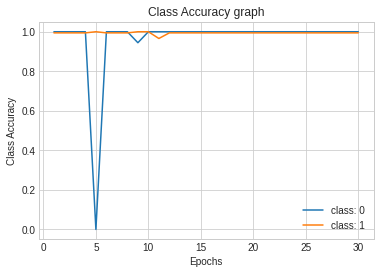

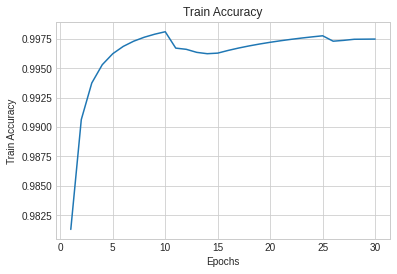

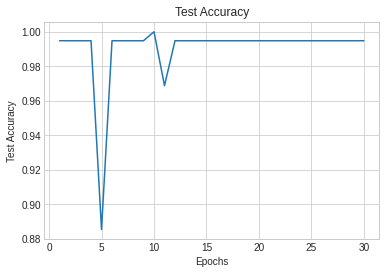

INFO - 2020-11-29 08:12:48,903 - <ipython-input-21-a15c32a2716c> - End of training...


In [ ]:
main(argss)

In [ ]:
# !rm -rf log
# !cp -r log/classification/pointnet_cls/ /content/drive/MyDrive/logs_training/
# !cat /content/datasets/IntrA/generated/vessel/ad/ArteryObjAN32-14_addon.ad
# !cat /content/datasets/IntrA/generated/vessel/ad/ArteryObjAN195-19.ad